<center><h1> Biomechanical Testing Data Analysis</h1></center>
This Jupyter notebook will house all of the data analysis for all the procedures for the Biomechanical Testing Laboratory. This lab is dependent on the StressStrain.py file as it contains all of the data analysis algorithms and also gives the benefit of storing data in a more organized fashion


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from StressStrain import StressStrain as SS#This is my own module
from scipy import stats
import itertools

## Procedure 1 
Here we will take a look at calculating the maximum stress, plotting a Stress Strain Plot, as well as finding the Young's modulus for all three specimen. The code for the Linear Regression can be found in StressStrain.py

In [2]:
#Import the data
procedure1=[]
for i in ["Brass1",'Brass2','Brass3']:
    #We want to iterate over the different sheets of which there are three
    procedure1.append(SS(pd.read_csv('./Procedure1/Procedure1{}.csv'.format(i),nrows=10)))
    

YoungsModulus=[]
YoungError=[]
intercepts=[]
intercept_error=[]
outputProcedure1=[]
for x in procedure1:
    o,youngsMod,b,youngError,b_error=x.youngsModulus()
    outputProcedure1.append(o)
    YoungError.append(youngError)
    intercepts.append(b)
    intercept_error.append(b_error)
    YoungsModulus.append(youngsMod)
#Now we can output our data
P1Final=pd.DataFrame(data={"Youngs Modulus(Pa)":YoungsModulus},index=["Brass 1",'Brass 2','Brass 3'])

P1Final.to_csv("./Output/Procedure1/Brass123YoungMod.csv")

averageP1=np.average(P1Final["Youngs Modulus(Pa)"])
stdevP1=np.std(P1Final["Youngs Modulus(Pa)"])

print("The Average Young's Modulus is {} with a standard deviation of {}".format(averageP1,stdevP1))
P1Final.head()

The Average Young's Modulus is 114446202029.97142 with a standard deviation of 2579210340.5382705


,Youngs Modulus(Pa)
Brass 1,1.108140e+11
Brass 2,1.165520e+11
Brass 3,1.159726e+11


To see how well this regression fits the model we can plot the sets of data for Brass 1 below

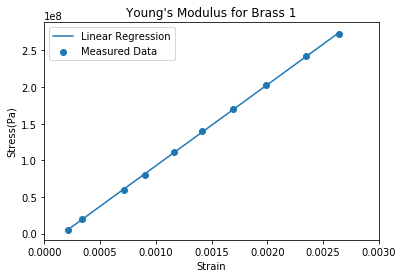

In [3]:
plt.Figure(figsize=(7,8))
plt.scatter(outputProcedure1[0]['Strain'],outputProcedure1[0]['Max Stress(Pa)'],label='Measured Data')
plt.plot(outputProcedure1[0]['Strain'],YoungsModulus[0]*outputProcedure1[0]['Strain']+intercepts[0],
         label='Linear Regression')
plt.xlim((0,0.0030))
plt.legend()
plt.title("Young's Modulus for Brass 1")
plt.xlabel("Strain")
plt.ylabel("Stress(Pa)")
plt.savefig("./Output/Procedure1/Young's Modulus for Brass 1")

## Procedure 2: Destructive Bending Test
In this we will be determining the Young's Modulus for a destructive bending test and comparing it to the Young's Modulus obtained before. However, this time we will have to deal with different types of data where we are given the Load and the Deflection of the Brass

Text(0.5,1,'Brass 3')

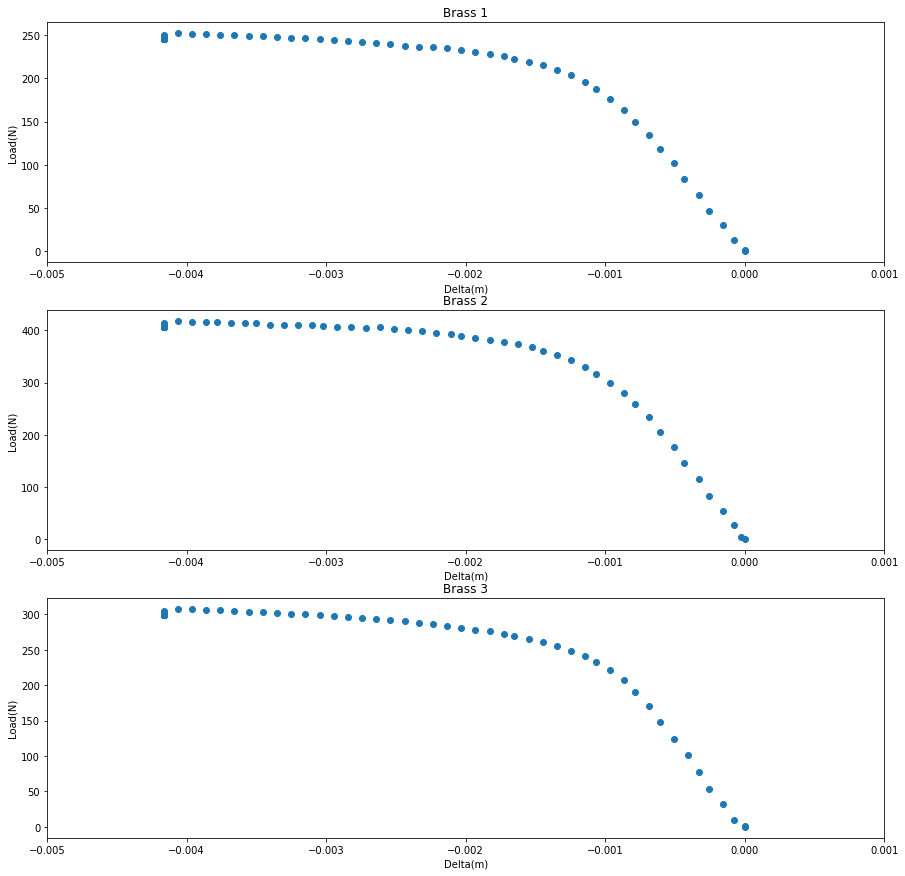

In [4]:
#Import and process the Data
procedure2=[]
for i in ["Brass1",'Brass2','Brass3']:
    #We want to iterate over the different sheets of which there are three
    procedure2.append(SS(pd.read_csv('./Procedure2/{}.csv'.format(i),nrows=92),loadDeflection=True))
    
#Plot the data to find the cutoff points
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
x,y=procedure2[0].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.xlabel("Delta(m)")
plt.title("Brass {}".format(1)) 

plt.subplot(3,1,2)
x,y=procedure2[1].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.xlabel("Delta(m)")
plt.title("Brass {}".format(2)) 

plt.subplot(3,1,3)
x,y=procedure2[2].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.xlabel("Delta(m)")
plt.title("Brass {}".format(3)) 


### Get CutOffs
In order to calculate the stiffness, we need to run a linear regression on only the the elastic region of the plot above. To do this, the algorithm uses a cutoff and simply removes all other points from consideration. This cutoff will be entered and the data will be subsequently calculated below

In [5]:
cutoffs=[-0.001,-0.001,-0.001]
p2Ymod=[]
p2Stiff=[]
for c in range(0,len(procedure2)):
    #We want to set the cuttoff correctly
    procedure2[c].setCutOff(cutoffs[c])
    #With the cuttoff set we can now process the data
    p2Ymod.append(procedure2[c].youngsModulus())
    p2Stiff.append(procedure2[c].getStiffness())

#Append this columns to the procedure ones data
P1Final["Destructive Youngs Modulus{Pa}"]=p2Ymod
P1Final['Stiffness']=p2Stiff

#Calculate the Average and Standard Deviation

averageP2=np.average(P1Final["Destructive Youngs Modulus{Pa}"])
stdevP2=np.std(P1Final["Destructive Youngs Modulus{Pa}"])

print("The Average Young's Modulus is {} with a standard deviation of {}".format(averageP2,stdevP2))
P1Final.head()

The Average Young's Modulus is 136431093048.8326 with a standard deviation of 28087674642.43303


,Youngs Modulus(Pa),Destructive Youngs Modulus{Pa},Stiffness
Brass 1,1.108140e+11,1.006001e+11,-187922.607554
Brass 2,1.165520e+11,1.691952e+11,-322575.602241
Brass 3,1.159726e+11,1.394979e+11,-241408.182766


### Find the Yield Load
This will be done by looking at the Stiffness linear regression and comparing it to the measured Load and deflection value

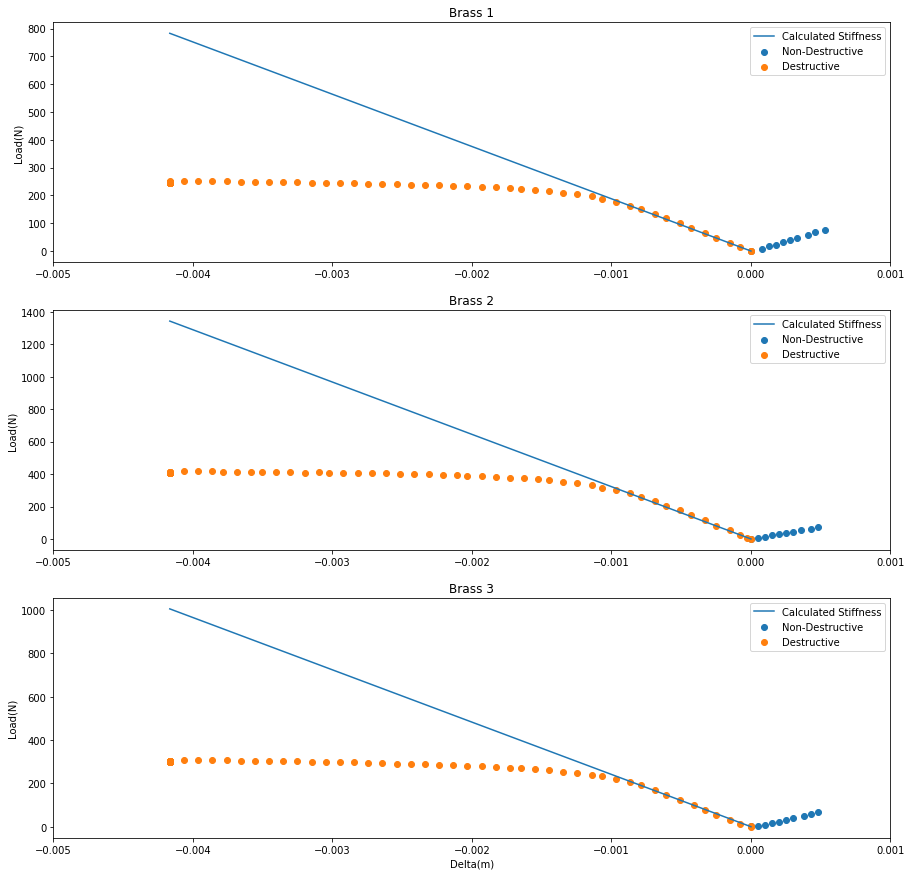

In [6]:
#Plot the data to find the cutoff points
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
x,y=procedure2[0].getDeltaLoad()
x1,y1=procedure1[0].getDeltaLoad()
plt.scatter(x1,y1,label="Non-Destructive")
plt.scatter(x,y,label="Destructive")
plt.plot(x,1*procedure2[0].getStiffness()*x,label="Calculated Stiffness")
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.legend()

plt.title("Brass {}".format(1)) 

plt.subplot(3,1,2)
x,y=procedure2[1].getDeltaLoad()
x1,y1=procedure1[1].getDeltaLoad()
plt.scatter(x1,y1,label="Non-Destructive")
plt.scatter(x,y,label="Destructive")
plt.plot(x,1*procedure2[1].getStiffness()*x,label="Calculated Stiffness")
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.legend()
plt.title("Brass {}".format(2)) 

plt.subplot(3,1,3)
x,y=procedure2[2].getDeltaLoad()
x1,y1=procedure1[2].getDeltaLoad()
plt.scatter(x1,y1,label="Non-Destructive")
plt.scatter(x,y,label="Destructive")
plt.plot(x,1*procedure2[2].getStiffness()*x,label="Calculated Stiffness")
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.xlabel("Delta(m)")
plt.title("Brass {}".format(3)) 
plt.legend()
plt.savefig("./Output/Procedure2/YieldLoadStress")

From the above, we can infer that the Yield Load is around 250(N) to 400(N))

## Compare the Two Young's Modulus Values

Now we will use the student's t-test to calculate the Young's modulus


In [7]:
#Define a t-test Method
#We want to compare the average Young's Modulus values
stats.ttest_ind(P1Final["Youngs Modulus(Pa)"],P1Final["Destructive Youngs Modulus{Pa}"])

Ttest_indResult(statistic=-1.102300926624012, pvalue=0.3321934401758481)

Based on the P-Value,received from the student's t-test, we are not able to reject the null hypothesis meaning that there is not in fact a significant difference between the two average values for the Young's Modulus calculated.

### Procedure 3: Polyethylene Bending Test
The data analysis is the exact same as above, so we can quickly run through this


Text(0.5,1,'Brass 3')

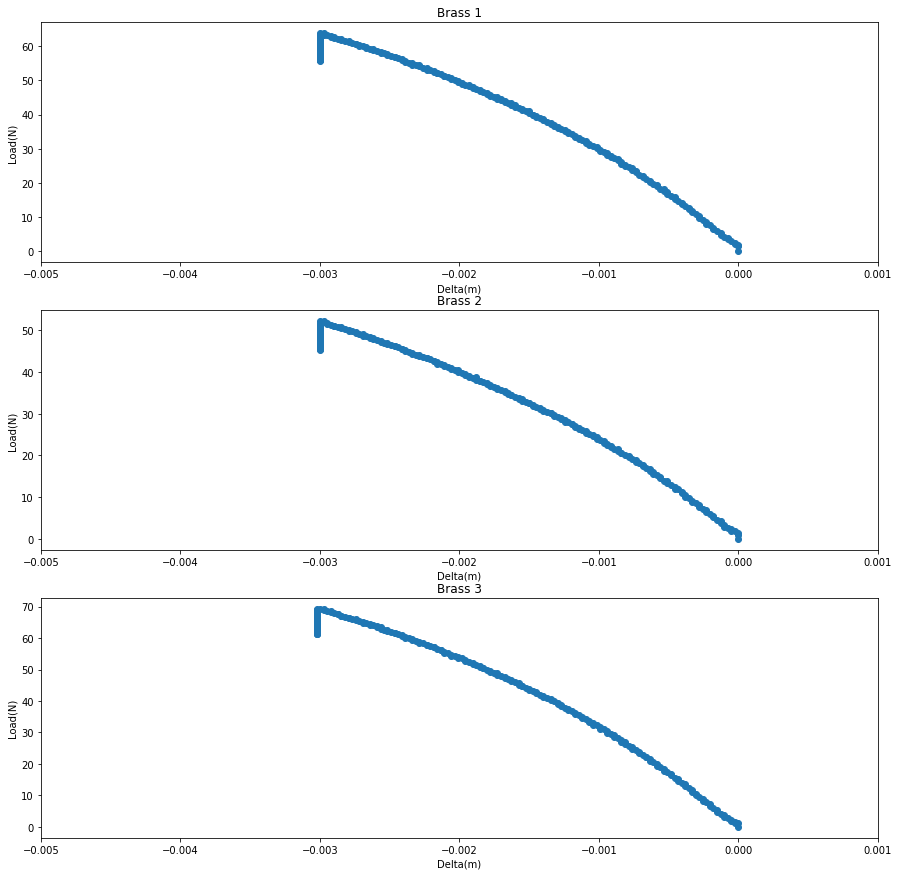

In [8]:
#import the data
procedure3A=[]
for i in ["A1","A2","A3"]:
    procedure3A.append(SS(pd.read_csv('./Procedure3/{}.csv'.format(i),nrows=246),loadDeflection=True))
procedure3B=[]
for i in ["b1","b2","b3"]:
    procedure3B.append(SS(pd.read_csv('./Procedure3/{}.csv'.format(i),nrows=246),loadDeflection=True))

#Plot the data to find the cutoff points
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
x,y=procedure3A[0].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.xlabel("Delta(m)")
plt.title("Brass {}".format(1)) 

plt.subplot(3,1,2)
x,y=procedure3A[1].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.xlabel("Delta(m)")
plt.title("Brass {}".format(2)) 

plt.subplot(3,1,3)
x,y=procedure3A[2].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.xlabel("Delta(m)")
plt.title("Brass {}".format(3)) 

In [9]:
cutoffs=[-0.001,-0.001,-0.001]
p3AYmod=[]
p3AStiff=[]
for c in range(0,len(procedure2)):
    #We want to set the cuttoff correctly
    procedure3A[c].setCutOff(cutoffs[c])
    #With the cuttoff set we can now process the data
    p3AYmod.append(procedure3A[c].youngsModulus())
    p3AStiff.append(procedure3A[c].getStiffness())

P3Final=pd.DataFrame({"Youngs Modulus(Pa) A":p3AYmod,"Stiffness A":p3AStiff})

#Calculate the Average and Standard Deviation

averageP3A=np.average(P3Final["Youngs Modulus(Pa) A"])
stdevP3A=np.std(P3Final["Youngs Modulus(Pa) A"])

AvgStiff=np.average(P3Final['Stiffness A'])
stdStiff=np.std(P3Final['Stiffness A'])

print("The Average Young's Modulus is {} with a standard deviation of {}".format(averageP3A,stdevP3A))

print("The Average Stiffness is {} with a standard deviation of {}".format(AvgStiff,stdStiff))
P3Final.head()

The Average Young's Modulus is 933009654.3202683 with a standard deviation of 84912298.9593057
The Average Stiffness is -28079.82826781712 with a standard deviation of 3601.8197052529304


,Stiffness A,Youngs Modulus(Pa) A
0,-28929.076485,9.793732e+08
1,-23305.636263,8.138958e+08
2,-32004.772055,1.005760e+09


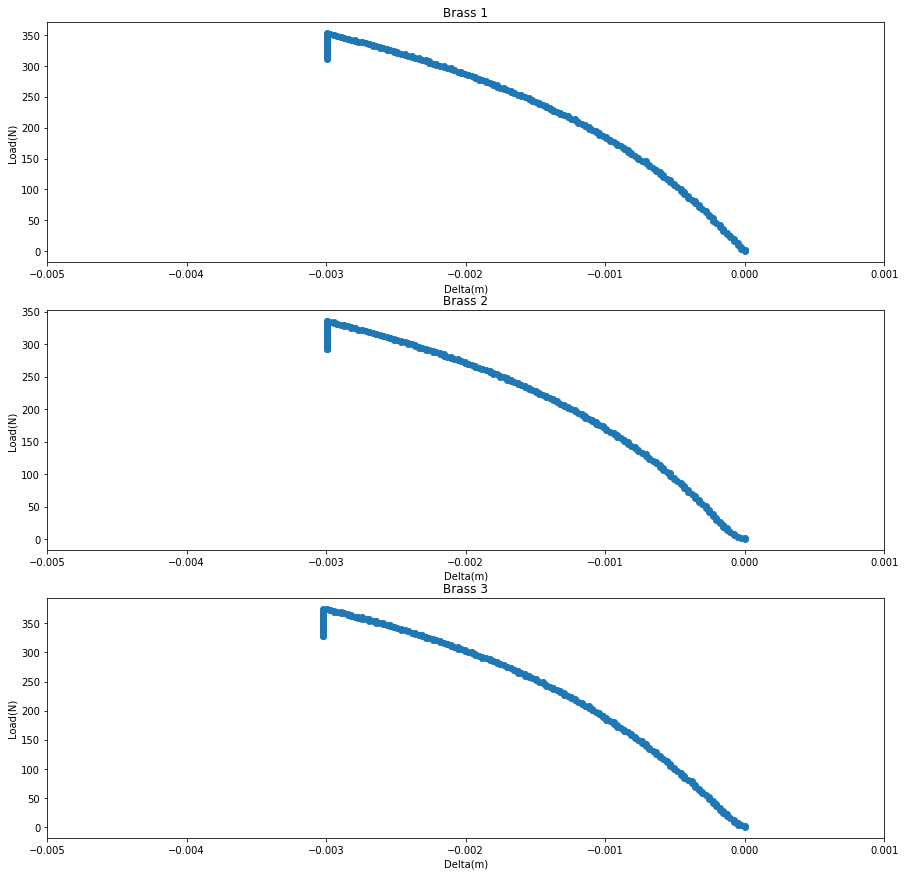

In [10]:
#Do the Same for B
#Plot the data to find the cutoff points
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
x,y=procedure3B[0].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.xlabel("Delta(m)")
plt.title("Brass {}".format(1)) 

plt.subplot(3,1,2)
x,y=procedure3B[1].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.xlabel("Delta(m)")
plt.title("Brass {}".format(2)) 

plt.subplot(3,1,3)
x,y=procedure3B[2].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.xlabel("Delta(m)")
plt.title("Brass {}".format(3)) 
plt.savefig("./Output/Procedure3/LoadDeltaInOrientationAorB")

In [11]:
cutoffs=[-0.001,-0.001,-0.001]
p3BYmod=[]
p3BStiff=[]
for c in range(0,len(procedure2)):
    #We want to set the cuttoff correctly
    procedure3B[c].setCutOff(cutoffs[c])
    #With the cuttoff set we can now process the data
    p3BYmod.append(procedure3A[c].youngsModulus())
    p3BStiff.append(procedure3A[c].getStiffness())


P3Final["Youngs Modulus(Pa) B"]=p3BYmod
P3Final["Stiffness B"]=p3BStiff

#Calculate the Average and Standard Deviation

averageP3B=np.average(P3Final["Youngs Modulus(Pa) B"])
stdevP3B=np.std(P3Final["Youngs Modulus(Pa) B"])

AvgStiff=np.average(P3Final['Stiffness B'])
stdStiff=np.std(P3Final['Stiffness B'])

print("The Average Stiffness is {} with a standard deviation of {}".format(AvgStiff,stdStiff))
print("The Average Young's Modulus is {} with a standard deviation of {}".format(averageP3B,stdevP3B))
P3Final.head()

The Average Stiffness is -28079.82826781712 with a standard deviation of 3601.8197052529304
The Average Young's Modulus is 933009654.3202683 with a standard deviation of 84912298.9593057


,Stiffness A,Youngs Modulus(Pa) A,Youngs Modulus(Pa) B,Stiffness B
0,-28929.076485,9.793732e+08,9.793732e+08,-28929.076485
1,-23305.636263,8.138958e+08,8.138958e+08,-23305.636263
2,-32004.772055,1.005760e+09,1.005760e+09,-32004.772055


### Compare the Young's Modulus in Orientations A and B
We will do the same procedure as above, when comparing the destructive and non-destructive tests. First we will graph them and compare the graphs of the load and displacement

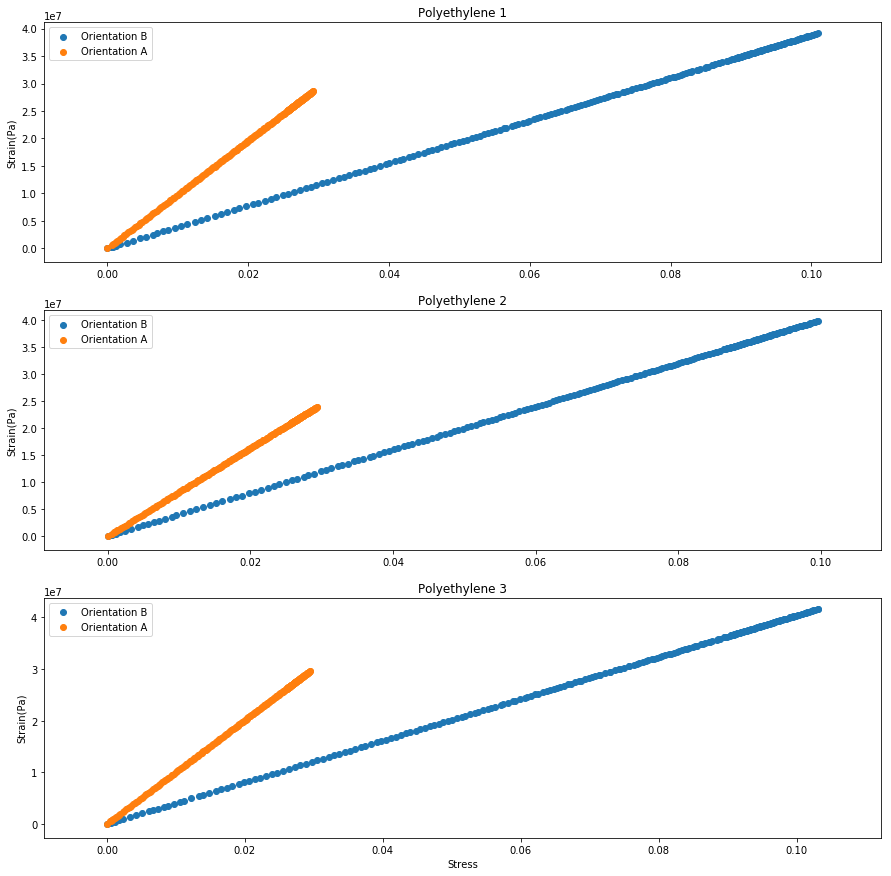

In [19]:
#Plot the data to find the cutoff points
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
x,y=procedure3A[0].getStressStrain()
x1,y1=procedure3B[0].getStressStrain()
plt.scatter(x1,y1,label="Orientation B")
plt.scatter(x,y,label="Orientation A")
plt.ylabel("Strain(Pa)")
plt.legend()

plt.title("Polyethylene {}".format(1)) 

plt.subplot(3,1,2)
x,y=procedure3A[1].getStressStrain()
x1,y1=procedure3B[1].getStressStrain()
plt.scatter(x1,y1,label="Orientation B")
plt.scatter(x,y,label="Orientation A")
plt.ylabel("Strain(Pa)")
plt.legend()
plt.title("Polyethylene {}".format(2)) 

plt.subplot(3,1,3)
x,y=procedure3A[2].getStressStrain()
x1,y1=procedure3B[2].getStressStrain()
plt.scatter(x1,y1,label="Orientation B")
plt.scatter(x,y,label="Orientation A")
plt.ylabel("Strain(Pa)")
plt.xlabel("Stress")
plt.title("Polyethylene {}".format(3)) 
plt.legend()
plt.savefig("./Output/Procedure3/LoadDeltaOrientationAB")

In [13]:
#Define a t-test Method
#We want to compare the average Young's Modulus values
print("T-test for Young's Modulus is {}".format(stats.ttest_ind(P3Final["Youngs Modulus(Pa) A"],
                                                                P3Final["Youngs Modulus(Pa) B"])))

print("T-test for Stiffness is {}".format(stats.ttest_ind(P3Final["Stiffness A"],
                                                                P3Final["Stiffness B"])))


T-test for Young's Modulus is Ttest_indResult(statistic=0.0, pvalue=1.0)
T-test for Stiffness is Ttest_indResult(statistic=0.0, pvalue=1.0)


Based on the p-value from the t-test above, we can conclude that there is no statistically significant difference between the two Young's Modulus and Stiffness values for orientation A and B. In fact, with a p-value of 1.0, we can conclude that they are in fact the same value.

## Procedure 4: Mechanical Testing of Bone

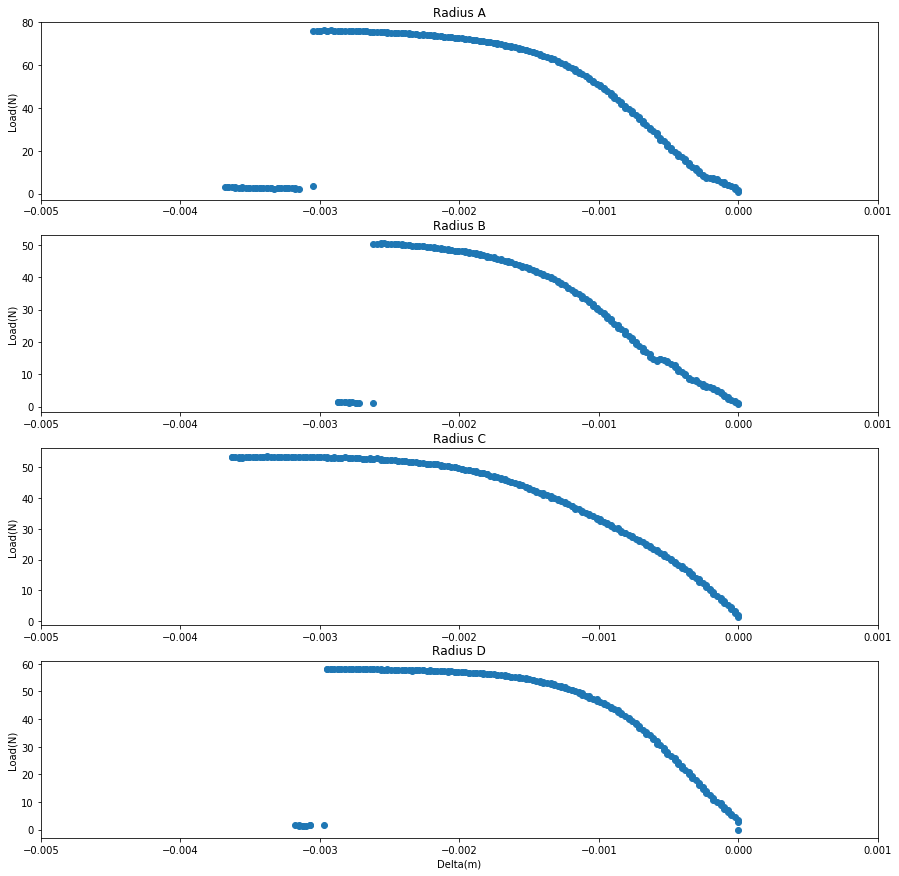

In [14]:
#Import the data
procedure4R=[]
procedure4U=[]
for i in ['A','B','C','D']:
    procedure4R.append(SS(pd.read_csv('./Procedure4/Radius-{}.csv'.format(i),nrows=226),loadDeflection=True,cylinder=True))
    procedure4U.append(SS(pd.read_csv('./Procedure4/Ulna - {}.csv'.format(i),nrows=226),loadDeflection=True,cylinder=True))

#Plot the data to find the cutoff points
plt.figure(figsize=(15,15))
plt.subplot(4,1,1)
x,y=procedure4R[0].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.title("Radius A") 

plt.subplot(4,1,2)
x,y=procedure4R[1].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.title("Radius B") 

plt.subplot(4,1,3)
x,y=procedure4R[2].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.title("Radius C") 

plt.subplot(4,1,4)
x,y=procedure4R[3].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.xlabel("Delta(m)")
plt.title("Radius D") 
plt.savefig("./Output/Procedure4/LoadDeltaRadiusABCD")

In [15]:
cutoffs=[-0.001,-0.001,-0.001,-0.001]
p4RYmod=[]
p4RStiff=[]
for c in range(0,len(procedure4R)):
    #We want to set the cuttoff correctly
    procedure4R[c].setCutOff(cutoffs[c])
    #With the cuttoff set we can now process the data
    p4RYmod.append(procedure4R[c].youngsModulus())
    p4RStiff.append(procedure4R[c].getStiffness())

P4Final=pd.DataFrame({"Youngs Modulus(Pa) Radius":p4RYmod,"Radius Stiffness":p4RStiff})

#Calculate the Average and Standard Deviation

average=np.average(P4Final["Youngs Modulus(Pa) Radius"])
stdev=np.std(P4Final["Youngs Modulus(Pa) Radius"])

print("The Average Young's Modulus is {} with a standard deviation of {}".format(average,stdev))
P4Final.head()

The Average Young's Modulus is 5807920303.766314 with a standard deviation of 1165429933.0785341


,Radius Stiffness,Youngs Modulus(Pa) Radius
0,-51946.112653,6.262989e+09
1,-27903.103599,4.256759e+09
2,-30942.149028,5.302637e+09
3,-45975.862662,7.409297e+09


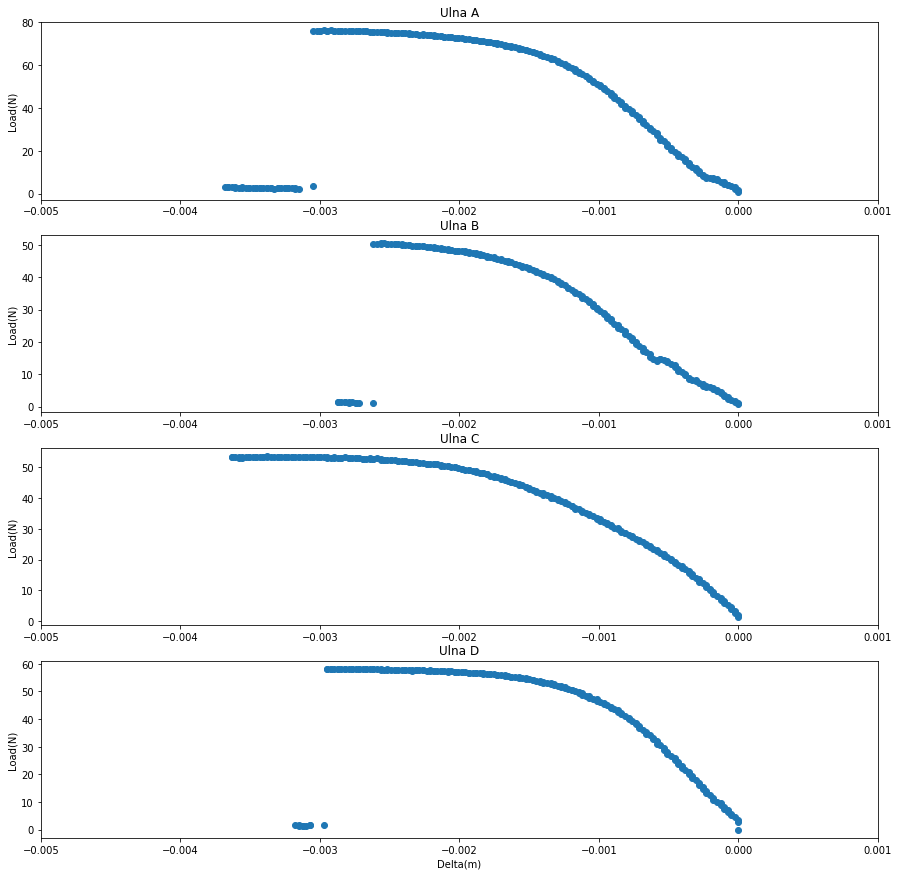

In [16]:
#Plot the data to find the cutoff points
plt.figure(figsize=(15,15))
plt.subplot(4,1,1)
x,y=procedure4R[0].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.title("Ulna A") 

plt.subplot(4,1,2)
x,y=procedure4R[1].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.title("Ulna B") 

plt.subplot(4,1,3)
x,y=procedure4R[2].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.title("Ulna C") 

plt.subplot(4,1,4)
x,y=procedure4R[3].getDeltaLoad()
plt.scatter(x,y)
plt.xlim(-0.005,0.001)
plt.ylabel("Load(N)")
plt.xlabel("Delta(m)")
plt.title("Ulna D") 
plt.savefig("./Output/Procedure4/LoadDeltaUlnaABCD")

In [17]:
cutoffs=[-0.001,-0.001,-0.001,-0.001]
p4UYmod=[]
p4UStiff=[]
for c in range(0,len(procedure4U)):
    #We want to set the cuttoff correctly
    procedure4U[c].setCutOff(cutoffs[c])
    #With the cuttoff set we can now process the data
    p4UYmod.append(procedure4U[c].youngsModulus())
    p4UStiff.append(procedure4U[c].getStiffness())

P4Final["Youngs Modulus(Pa) Ulna"]=p4UYmod
P4Final["Ulna Stiffnes"]=p4UStiff

#Calculate the Average and Standard Deviation

average=np.average(P4Final["Youngs Modulus(Pa) Ulna"])
stdev=np.std(P4Final["Youngs Modulus(Pa) Ulna"])

print("The Average Young's Modulus is {} with a standard deviation of {}".format(average,stdev))
P4Final.head()

The Average Young's Modulus is 3479588700.374385 with a standard deviation of 1363048357.5944848


,Radius Stiffness,Youngs Modulus(Pa) Radius,Youngs Modulus(Pa) Ulna,Ulna Stiffnes
0,-51946.112653,6.262989e+09,1.137561e+09,-66542.304022
1,-27903.103599,4.256759e+09,4.524051e+09,-104617.367872
2,-30942.149028,5.302637e+09,4.211356e+09,-145818.706471
3,-45975.862662,7.409297e+09,4.045387e+09,-140071.985298


Now Compare all of them using a student's t-test

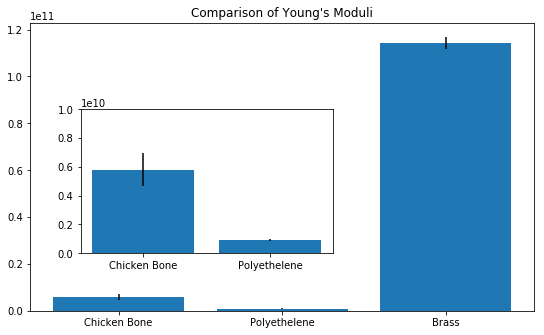

In [18]:
tTestList=[P4Final['Youngs Modulus(Pa) Radius'],P3Final["Youngs Modulus(Pa) A"],
           P1Final["Youngs Modulus(Pa)"]]
stdev=[]
average=[]
specimen=["Chicken Bone","Polyethelene","Brass"]
for i in tTestList:
    stdev.append(np.std(i))
    average.append(np.average(i))
fig=plt.figure(figsize=(7,4))

ax1=fig.add_axes([0,0,1,1])
ax1.bar(specimen,average,yerr=stdev)
ax1.set_title("Comparison of Young's Moduli")
ax2=fig.add_axes([0.1,0.2,0.5,0.5])
ax2.set_ylim([0,0.1*10**11])
ax2.bar(specimen[0:2],average[0:2],yerr=stdev[0:2])
plt.savefig("./Output/Procedure4/Young'sModulusComparisonBonePleBrass",bbox_inches="tight")